## Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

plt.rcParams["patch.force_edgecolor"] = True

## Functions

In [3]:
def load_dataset(experiment, types):
    dataset_one = pd.read_csv(f'./result_extraction/{experiment}/dataset_query_result_{types[0]}.csv', dtype=str)
    dataset_two = pd.read_csv(f'./result_extraction/{experiment}/dataset_query_result_{types[1]}.csv', dtype=str)
    
    files = os.listdir(f'./result_extraction/{experiment}')
    if not('analysis_images' in files):
        os.mkdir(f'./result_extraction/{experiment}/analysis_images')
    
    dataset_one['type'] = [types[0]]*len(dataset_one)
    dataset_two['type'] = [types[1]]*len(dataset_two)
    
    frames = [dataset_one, dataset_two]
    final_dataset = pd.concat(frames)
    
    if len(final_dataset) == (len(dataset_one) + len(dataset_two)):
        return final_dataset
    else:
        print('THERE IS A PROBLEMS...')
        return -1
    
def plot_pie_chart(dictionary_values, typology, experiment, field):
    dictionary_values = dict(sorted(dictionary_values.items()))
    title = f'{field} for: {typology}'
    bins = list(dictionary_values.keys())
    values = list(dictionary_values.values())
    
    fig, ax = plt.subplots()
    ax.pie(values, labels = bins, shadow=True, startangle = 90, 
           wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%')

    ax.set_title(title)
    save_img(title, experiment)
    plt.show() 

def pie_chart(query_result, types, field, experiment):
    grp = query_result.groupby(['type'])
    dict_0 = dict(grp[field].value_counts(normalize = True).loc[types[0]])
    dict_1 = dict(grp[field].value_counts(normalize = True).loc[types[1]])
    
    plot_pie_chart(dict_0, types[0], experiment, field)
    plot_pie_chart(dict_1, types[1], experiment, field)
    
    
def save_img(title, experiment):
    plt.savefig(f'./result_extraction/{experiment}/analysis_images/{title}.png', 
                dpi = 300, quality = 95, format = 'png', pad_inches = 1000)
    
def violin(query_result, types, field, experiment):
    df = pd.DataFrame(columns=[f'{field}', 'type', 'placeholder'])
    for _, row in query_result.iterrows():
        df.loc[len(df)] = [row[f'{field}'], row['type'], '']
    
    df[field] = df[field].apply(lambda x: float(x))
    
    plot_violin(df, types, field, experiment)
    
def plot_violin(df, types, field, experiment):
    
    fig, ax = plt.subplots()
    ax = sns.violinplot(x='placeholder', y=field, hue='type', data=df, split=True, inner='quartile', bw=0.2)
    title = f'{field.capitalize()} distribution'
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Distribution values')
    ax.legend()
    save_img(title, experiment)
    plt.show()
    
def distplot(query_result, types, field, experiment):
    df = pd.DataFrame(columns=[f'{field}', 'type'])
    for _, row in query_result.iterrows():
        df.loc[len(df)] = [row[f'{field}'], row['type']]
    
    df[field] = df[field].apply(lambda x: float(x))

    
    plot_distplot(df, types, field, experiment)
    
def plot_distplot(df, types, field, experiment):
    
    title = f'Distribution plot on {field}'
    type0 = df.query(f'type == "{types[0]}"')
    type1 = df.query(f'type == "{types[1]}"')
    fig, ax = plt.subplots()
    ax = sns.distplot(type0[f'{field}'], hist=False, label=f'{field} on {types[0]}')
    ax = sns.distplot(type1[f'{field}'], hist=False, label=f'{field} on {types[1]}')
    ax.set_title(title)
    ax.set_xlabel(f'{field}')
    ax.set_ylabel('Distribution')
    ax.legend()
    save_img(title, experiment)
    plt.show()

## Main

### Healthy vs not healthy

In [17]:
query_result_healthy_vs_not = load_dataset('healthy_vs_not_healthy', ['healthy', 'not_healthy'])

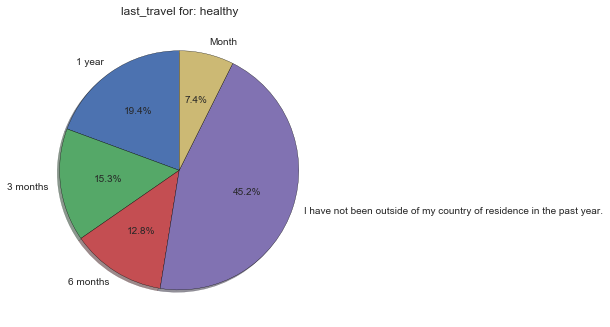

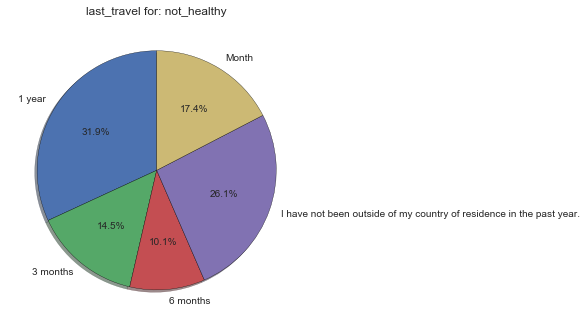

In [26]:
pie_chart(query_result_healthy_vs_not, ['healthy', 'not_healthy'], 'last_travel', 'healthy_vs_not_healthy')

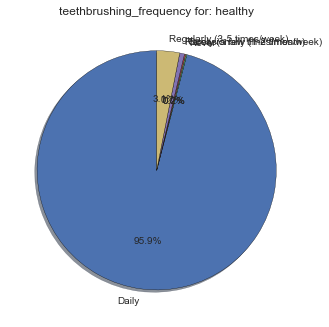

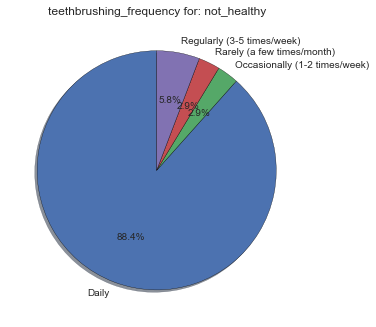

In [30]:
pie_chart(query_result_healthy_vs_not, ['healthy', 'not_healthy'], 'teethbrushing_frequency', 'healthy_vs_not_healthy')

In [ ]:
pie_chart(query_result_healthy_vs_not, ['healthy', 'not_healthy'], 'sex', 'healthy_vs_not_healthy')

In [ ]:
pie_chart(query_result_healthy_vs_not, ['healthy', 'not_healthy'], 'vitamin_d_supplement_frequency', 'healthy_vs_not_healthy')

In [ ]:
pie_chart(query_result_healthy_vs_not, ['healthy', 'not_healthy'], 'fruit_frequency', 'healthy_vs_not_healthy')

In [ ]:
violin(query_result_healthy_vs_not, ['healthy', 'not_healthy'], 'age_years', 'healthy_vs_not_healthy')

In [ ]:
distplot(query_result_healthy_vs_not, ['healthy', 'not_healthy'], 'bmi', 'healthy_vs_not_healthy')

### Not healthy young vs not healthy old

In [19]:
query_result_not_healthy_young_old = load_dataset('not_healthy_old_vs_not_healthy_young', ['not_healthy_young', 'not_healthy_old'])

In [ ]:
pie_chart(query_result_not_healthy_young_old, ['not_healthy_young', 'not_healthy_old'], 'exercise_frequency', 'not_healthy_old_vs_not_healthy_young')

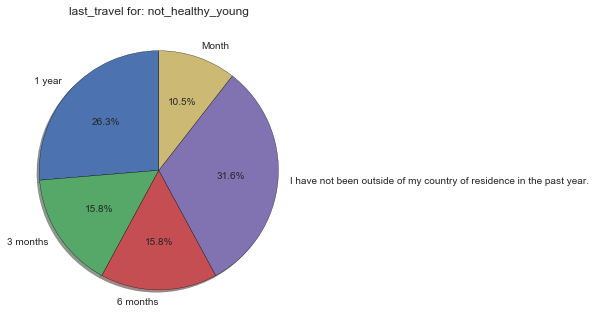

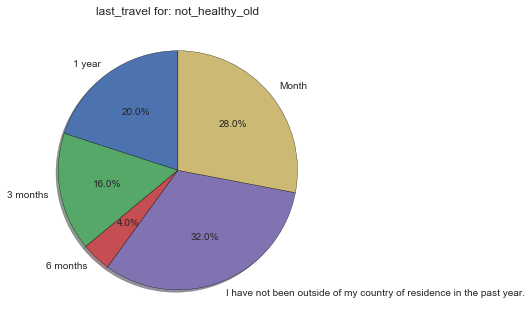

In [25]:
pie_chart(query_result_not_healthy_young_old, ['not_healthy_young', 'not_healthy_old'], 'last_travel', 'not_healthy_old_vs_not_healthy_young')

In [ ]:
pie_chart(query_result_not_healthy_young_old, ['not_healthy_young', 'not_healthy_old'], 'sex', 'not_healthy_old_vs_not_healthy_young')

In [ ]:
pie_chart(query_result_not_healthy_young_old, ['not_healthy_young', 'not_healthy_old'], 'fruit_frequency', 'not_healthy_old_vs_not_healthy_young')

In [ ]:
violin(query_result_not_healthy_young_old, ['not_healthy_young', 'not_healthy_old'], 'age_years', 'not_healthy_old_vs_not_healthy_young')

### Mental illness vs food disease

In [4]:
query_result_mental_food = load_dataset('mental_ill_vs_food_dis', ['food_disorders', 'mental_illness'])

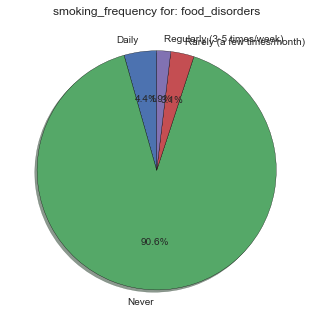

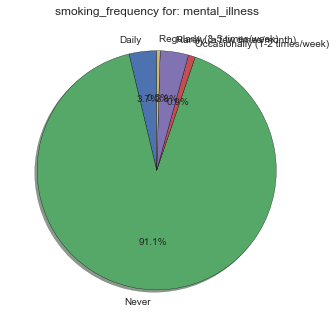

In [34]:
pie_chart(query_result_mental_food, ['food_disorders', 'mental_illness'], 'smoking_frequency', 'mental_ill_vs_food_dis')

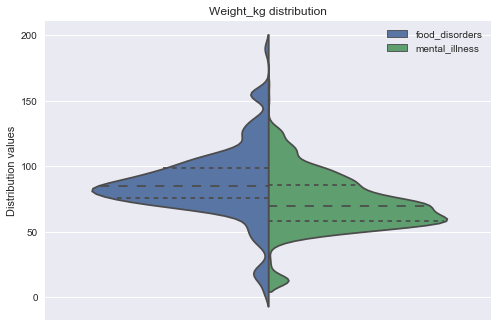

In [31]:
violin(query_result_mental_food, ['food_disorders', 'mental_illness'], 'weight_kg', 'mental_ill_vs_food_dis')

In [10]:
list(query_result_mental_food.columns)

['sample_name',
 'acid_reflux',
 'acne_medication',
 'acne_medication_otc',
 'add_adhd',
 'age_cat',
 'age_corrected',
 'age_years',
 'alcohol_consumption',
 'alcohol_frequency',
 'alcohol_types',
 'alcohol_types_beercider',
 'alcohol_types_red_wine',
 'alcohol_types_sour_beers',
 'alcohol_types_spiritshard_alcohol',
 'alcohol_types_unspecified',
 'alcohol_types_white_wine',
 'allergic_to',
 'allergic_to_i_have_no_food_allergies_that_i_know_of',
 'allergic_to_other',
 'allergic_to_peanuts',
 'allergic_to_shellfish',
 'allergic_to_tree_nuts',
 'allergic_to_unspecified',
 'altitude',
 'alzheimers',
 'animal_age',
 'animal_free_text',
 'animal_gender',
 'animal_origin',
 'animal_type',
 'anonymized_name',
 'antibiotic_history',
 'appendix_removed',
 'artificial_sweeteners',
 'asd',
 'assigned_from_geo',
 'autoimmune',
 'birth_year',
 'bmi',
 'bmi_cat',
 'bmi_corrected',
 'body_habitat',
 'body_product',
 'body_site',
 'bowel_movement_frequency',
 'bowel_movement_quality',
 'breastmilk_for